In [2]:
import tensorflow as tf

# Load the model from the .h5 file
model = tf.keras.models.load_model('final_model.h5')

# Print the model summary to verify it was loaded correctly
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,572 (478.80 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import tensorflow as tf

# Load the dataset
dataset = load_dataset('wasifis/cifar-10-100', split='train')



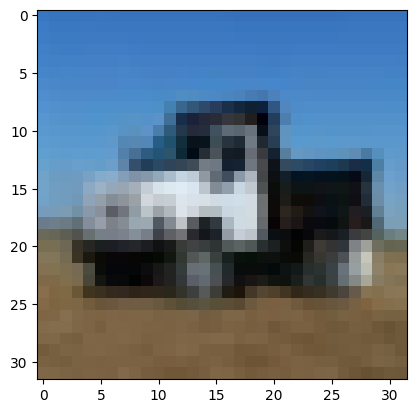

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Original label is truck and predicted label is airplane


In [ ]:
# Define the labels
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

# Select the image from our dataset
image_number = 80

# Extract a single entry
entry = dataset[image_number]

# Convert the image to a NumPy array
image_array = np.array(entry['img'])

# Extract the label
original_label = labels[entry['label']]

# Display the image
plt.imshow(image_array)
plt.show()

# Reshape the image for prediction
image_reshaped = image_array.reshape(1, 32, 32, 3)

# Load the pre-trained model
model = tf.keras.models.load_model('../final_model.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Make a prediction
predicted_label = labels[model.predict(image_reshaped).argmax()]

# Display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))